In [1]:
# Problem Statement
# Prepare a classification model using SVM for salary data 

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# reading csv file
data=pd.read_csv('SalaryData_Train(1).csv')

## EDA

In [4]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Label Encoding
label_encoder=preprocessing.LabelEncoder()
data['workclass']=label_encoder.fit_transform(data['workclass'])
data['education']=label_encoder.fit_transform(data['education'])
data['maritalstatus']=label_encoder.fit_transform(data['maritalstatus'])
data['occupation']=label_encoder.fit_transform(data['occupation'])
data['relationship']=label_encoder.fit_transform(data['relationship'])
data['race']=label_encoder.fit_transform(data['race'])
data['sex']=label_encoder.fit_transform(data['sex'])
data['native']=label_encoder.fit_transform(data['native'])
data['Salary']=label_encoder.fit_transform(data['Salary'])

In [6]:
data.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


In [7]:
# salary <= 50k is 0 and >50k is 1

In [8]:
data.shape

(30161, 14)

In [9]:
data.info()     # no missing values
                # data ype converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int32
 5   occupation     30161 non-null  int32
 6   relationship   30161 non-null  int32
 7   race           30161 non-null  int32
 8   sex            30161 non-null  int32
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int32
 13  Salary         30161 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.2 MB


In [10]:
cor=data.corr()
cor

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057,-0.193504
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


## Scaling

In [11]:
# Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
salary= norm_func(data)
salary.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564,0.0
5,0.273973,0.333333,0.800000,0.866667,0.333333,0.230769,1.0,1.0,0.0,0.000000,0.0,0.397959,0.948718,0.0
6,0.438356,0.333333,0.400000,0.266667,0.500000,0.538462,0.2,0.5,0.0,0.000000,0.0,0.153061,0.538462,0.0
7,0.479452,0.666667,0.733333,0.533333,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.448980,0.948718,1.0
8,0.191781,0.333333,0.800000,0.866667,0.666667,0.692308,0.2,1.0,0.0,0.140841,0.0,0.500000,0.948718,1.0
9,0.342466,0.333333,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.051781,0.0,0.397959,0.948718,1.0


In [13]:
salary.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,0.293673,0.366555,0.688907,0.608088,0.430014,0.458450,0.283664,0.919648,0.675707,0.010921,0.020271,0.407462,0.908038,0.248931
std,0.179929,0.158990,0.254151,0.170002,0.249670,0.309972,0.320272,0.208680,0.468118,0.074065,0.092773,0.122247,0.152729,0.432401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.333333,0.600000,0.533333,0.333333,0.153846,0.000000,1.000000,0.000000,0.000000,0.000000,0.397959,0.948718,0.000000
50%,0.273973,0.333333,0.733333,0.600000,0.333333,0.461538,0.200000,1.000000,1.000000,0.000000,0.000000,0.397959,0.948718,0.000000
75%,0.410959,0.333333,0.800000,0.800000,0.666667,0.692308,0.600000,1.000000,1.000000,0.000000,0.000000,0.448980,0.948718,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
cor2=salary.corr()
cor2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057,-0.193504
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


## Visualization

<Axes: >

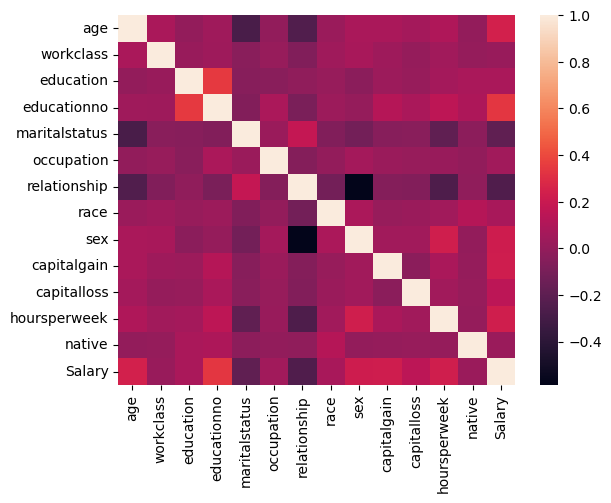

In [15]:
sns.heatmap(cor2)   # no high correlations

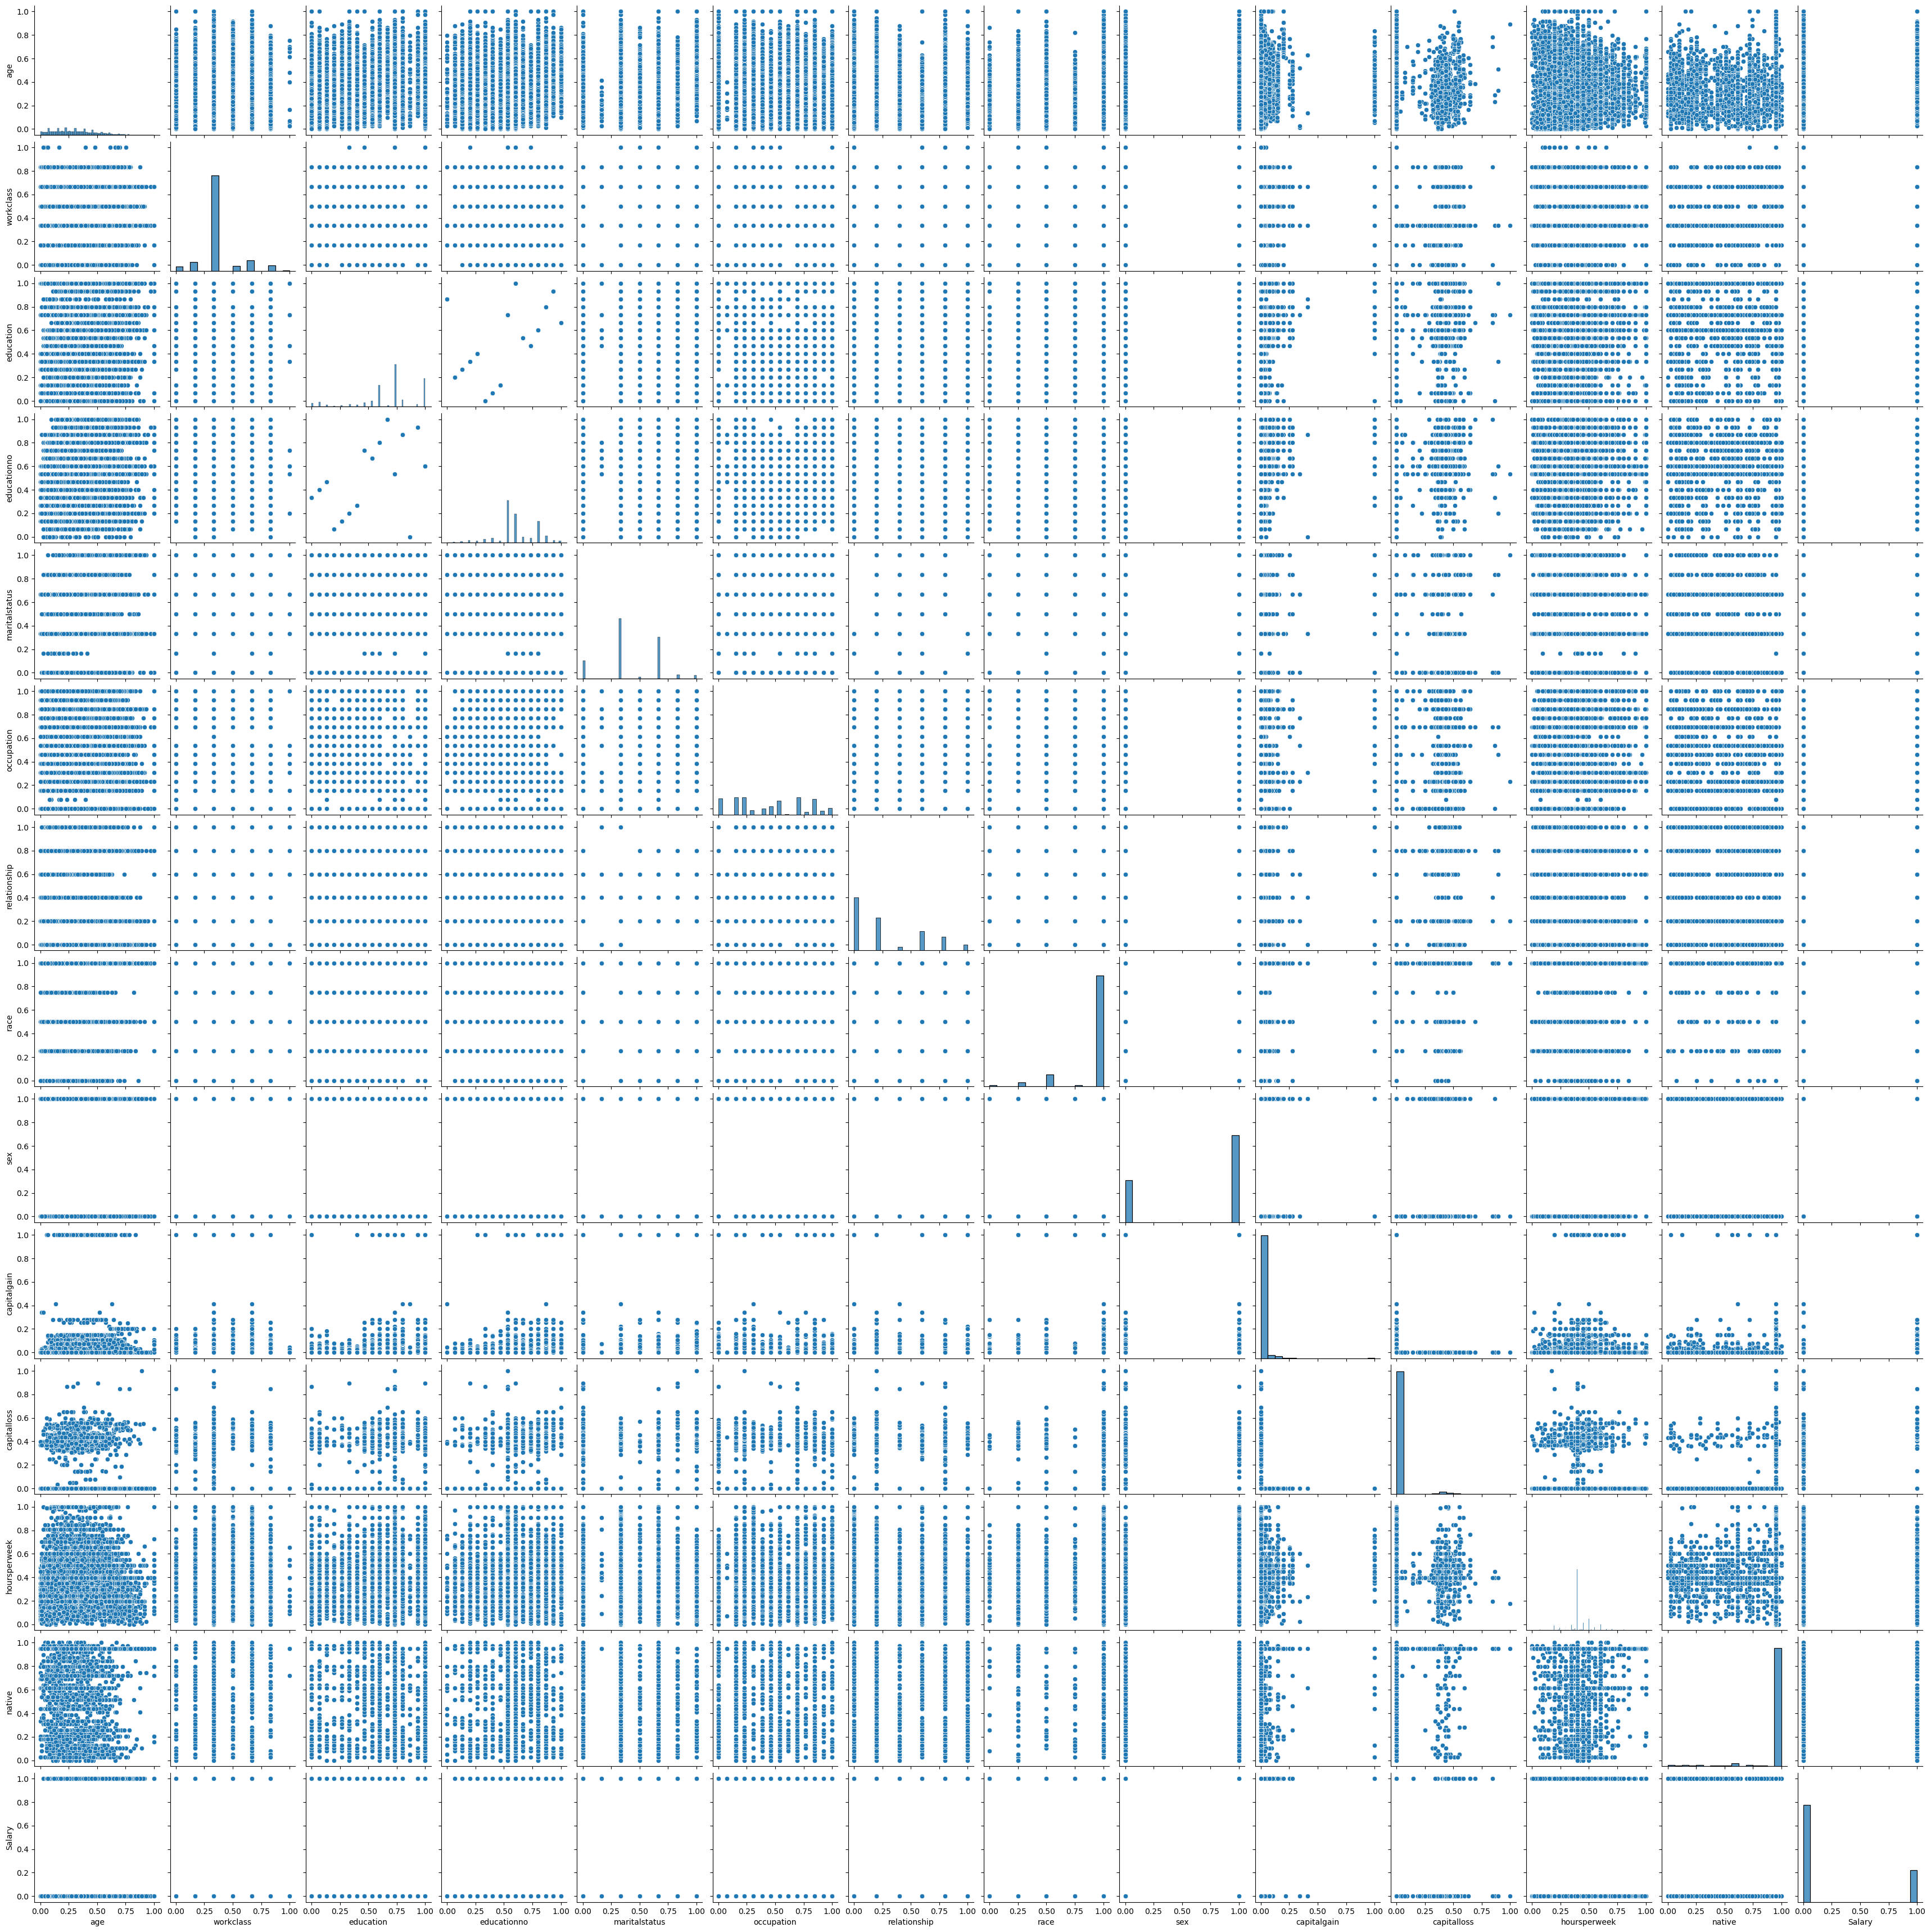

In [16]:
sns.pairplot(salary)
plt.show()

## x:features and y: output

In [17]:
x=salary.iloc[:,:13]
x.head(1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.30137,0.833333,0.6,0.8,0.666667,0.0,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718


In [18]:
y=salary.iloc[:,13:]
y.head(1)

,Salary
0,0.0


## Grid Search CV

In [20]:
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x,y)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [21]:
gsv.best_params_ , gsv.best_score_ 

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8294490262517703)

## Model

In [22]:
clf = SVC(kernel="rbf",gamma=0.1,C=1.0,random_state=40)
clf.fit(x, y)
y_pred_train = clf.predict(x)
acc = accuracy_score(y, y_pred_train) * 100
print("Accuracy =", acc)
confusion_matrix(y, y_pred_train)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 83.06090646861841


array([[21462,  1191],
       [ 3918,  3590]], dtype=int64)

## Test Data

In [24]:
test=pd.read_csv('SalaryData_Test(1).csv')

In [25]:
test.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


## Using Model on test data

In [26]:
# Label Encoding
label_encoder=preprocessing.LabelEncoder()
test['workclass']=label_encoder.fit_transform(test['workclass'])
test['education']=label_encoder.fit_transform(test['education'])
test['maritalstatus']=label_encoder.fit_transform(test['maritalstatus'])
test['occupation']=label_encoder.fit_transform(test['occupation'])
test['relationship']=label_encoder.fit_transform(test['relationship'])
test['race']=label_encoder.fit_transform(test['race'])
test['sex']=label_encoder.fit_transform(test['sex'])
test['native']=label_encoder.fit_transform(test['native'])
test['Salary']=label_encoder.fit_transform(test['Salary'])

# Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)
test_norm= norm_func(test)

x_test=test_norm.iloc[:,:13]
y_test=test_norm.iloc[:,13:]

# Model
y_pred_test= clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred_test)

Accuracy = 82.80876494023904


array([[10704,   656],
       [ 1933,  1767]], dtype=int64)

In [27]:
# Accuracy on training data: 83.06 
# Accuracy on test data: 82.80
# good accuracy for both training and test data.